In [1]:
import json
from pprint import pprint
import tinydb as tdb

In [2]:
# -- Charge le fichier JSON: --
# src: https://www.data.gouv.fr/fr/datasets/immeubles-proteges-au-titre-des-monuments-historiques/

filename = 'data/liste-des-immeubles-proteges-au-titre-des-monuments-historiques.json' 

with open(filename) as f:
    dataMerimee = json.load(f)
    
print( len(dataMerimee) )

dataMerimee = [ d['fields'] for d in  dataMerimee ]

45191


In [39]:
# To find an example:
for d in dataMerimee:
    if 'autr' in d:
        pprint(d)
        break

{'adrs': 'Aristide-Briand (place) ; Mairie (place de la)',
 'autr': "Rochas Jean (maître de l'oeuvre)",
 'code_departement': '84',
 'commune': 'Pernes-les-Fontaines',
 'coordonnees_insee': [43.9960550539, 5.03959100234],
 'dpro': '2009/03/31 : classé MH',
 'etud': 'recensement immeubles MH',
 'insee': '84088',
 'new_name': "Provence-Alpes-Côte d'Azur",
 'nom_dept': 'Vaucluse',
 'ppro': "Les parties bâties et non bâties de l'Hôtel de Ville, en totalité, à "
         'savoir le corps central, les ailes nord et sud, y compris leurs '
         "appendices en retour, l'aile sud-ouest, le mur de clôture de la cour "
         "d'honneur avec son portail et sa fontaine, les emprises de la cour "
         "d'honneur, des autres cours et des jardins, la fontaine du jardin "
         '(cad. AX 549, 638) : classement par arrêté du 31 mars 2009',
 'ref': 'PA00082123',
 'reg': "Provence-Alpes-Côte d'Azur",
 'reg_normalized': "provence alpes cote d'azur",
 'scle': '17e siècle',
 'stat': 'propriété de

In [40]:
# Liste les cles utilisees:
allkeys = { k for d in dataMerimee for k in d.keys()  }
print( sorted(allkeys) )

['adrs', 'affe', 'autr', 'code_departement', 'commune', 'coordonnees_insee', 'dpro', 'etud', 'insee', 'new_name', 'nom_dept', 'ppro', 'ref', 'reg', 'reg_normalized', 'scle', 'stat', 'tico']


 Liste et description des infos:
 
        adrs: adresse?
        affe: Organisne proprietaire?
        autr:  contact (architecte, maitre d'oeuvre, ...)
        code_departement:  numero du departement
        commune: -
        coordonnees_insee: coords GPS
        dpro: date de l'enregistrment?
        etud: etude d'origine? 
        insee: reference insee?
        new_name: Nouveau nom de la region?
        nom_dept: departement
        ppro:  description ?
        ref: reference Merimee
        reg: Region
        reg_normalized: Region
        scle: siecle
        stat: status  public/privee
        tico:  description ?
        
        
        
        
    Région: new_name[text]
    Département: nom_dept[text]
    Commune: commune[text]
    Appellation courante: tico[text]
    Siecle: scle[text]
    AUTEUR: autr[text]
    Précision sur la Protection: ppro[text]
    Date de Protection: dpro[text]
    Statut: stat[text]
    Adresse: adrs[text]
    INSEE: insee[text]
    AFFECTATAIRE: affe[text]
    ETUDE: etud[text]
    Référence: ref[text]
    Coordonnées INSEE: coordonnees_insee[geo_point_2d]
    Code département: code_departement[text]
    Ancienne région: reg[text]
    Région normalisée: reg_normalized[text]

In [5]:
'''  Liste toutes les valeurs utilisees  pour le status  ('stat')
'''

key = 'stat'
parseStatus = lambda s: s.split(';')
allStatus = { statut.strip().lower() for d in dataMerimee if key in d for statut in parseStatus( d[key] ) }
print(len(allStatus))
print( ', \n'.join(sorted(allStatus)) ) 

38
oropriété d'une personne privée, 
propriété d'un etat étranger, 
propriété d'un organisme professionnel, 
propriété d'un pays étranger, 
propriété d'un syndicat intercommunal, 
propriété d'un établissement public, 
propriété d'un établissement public communal, 
propriété d'un établissement public de coopération intercommunale, 
propriété d'un établissement public de l'etat, 
propriété d'un établissement public de l'état, 
propriété d'un établissement public départemental, 
propriété d'un établissement public régional, 
propriété d'un état étranger, 
propriété d'une association, 
propriété d'une association cultuelle, 
propriété d'une association diocésaine, 
propriété d'une collectivité territoriale, 
propriété d'une communauté d'agglomération, 
propriété d'une communauté de communes, 
propriété d'une communauté urbaine, 
propriété d'une personne privée, 
propriété d'une société privée, 
propriété de l'etat, 
propriété de l'office national des forêts, 
propriété de l'état, 
propriét

In [6]:
'''  Liste toutes les valeurs utilisees  pour le siecle  ('scle')
'''

key = 'scle'

def parseSiecle( s ):
    s = s.split(';')
    s = [ flat for v in s for flat in v.split(',')  ]
    s = [ v.replace('(?)', '') for v in s ]
    s = [ v.strip() for v in s ]
    return s
    
allValues = { value for d in dataMerimee if key in d
                    for value in parseSiecle(d[key]) }

print(len(allValues))
print( '; '.join(sorted(allValues)) ) 

174
; 10e siècle; 11e siècle; 12e siècle; 12e siècle : 13e siècle; 12e siècle. 16e siècle; 13e siècle; 13e siécle; 14e siècle; 14e siècle (détruit); 15e siècle; 16e siècle; 16è siècle; 17e siècle; 18e siècle; 19e siècle; 1er quart 10e siècle; 1er quart 11e siècle; 1er quart 12e siecle; 1er quart 12e siècle; 1er quart 13e siècle; 1er quart 14e siècle; 1er quart 15e siècle; 1er quart 16e siècle; 1er quart 17e siècle; 1er quart 18e siècle; 1er quart 19e siècle; 1er quart 1er siècle; 1er quart 20e siècle; 1er quart 21e siècle; 1er quart 2e siècle; 1er quart 5e siècle; 1er siècle; 1er siècle av. JC; 1ère moitié 10e siècle; 1ère moitié 11e siècle; 1ère moitié 12e siècle; 1ère moitié 13e siècle; 1ère moitié 14e siècle; 1ère moitié 15e siècle; 1ère moitié 16e siècle; 1ère moitié 17e siècle; 1ère moitié 18e siècle; 1ère moitié 19e siècle; 1ère moitié 19e siècle.; 1ère moitié 20e siècle; 1ère moitié 4e siècle; 1ère moitié 5e siècle; 1ére moitié 19e siècle; 20e siècle; 2e moitié 10e siècle; 2e mo

In [8]:
'''  Liste toutes les valeurs utilisees  pour le AFFE  ('affe')
'''

key = 'affe'
parseValue = lambda s: s.split(';')
allValues = { val.strip().lower() for d in dataMerimee if key in d
                                  for val in parseValue( d[key] ) }
print(len(allValues))
print( ', \n'.join(sorted(allValues)) ) 

69
association, 
association cultuelle, 
clergé, 
commune, 
conseil constitutionnel, 
conseil d'etat, 
conseil économique et social, 
conservatoire de l'espace littoral et des rivages lacustres, 
direction de l'architecture et du patrimoine, 
direction de la musique et de la danse, 
direction des archives de france, 
direction des musées de france, 
direction du livre et de la lecture, 
direction du patrimoine, 
direction générale des patrimoines, 
domaines, 
délégation aux arts plastiques, 
département, 
etat, 
france domaine, 
ministère chargé de l'agriculture, 
ministère chargé de l'agriculture et de la forêt, 
ministère chargé de l'agriculture, de l'agro-alimentaire et de la forêt, 
ministère chargé de l'emploi, 
ministère chargé de l'enseignement supérieur et de la recherche, 
ministère chargé de l'environnement, 
ministère chargé de l'industrie, 
ministère chargé de l'industrie et du tourisme, 
ministère chargé de l'intérieur, 
ministère chargé de l'écologie, de l'énergie, du dév

In [24]:
# Push to tinyDB

db = tdb.TinyDB('data/tinyDB.json')
db.purge_table('merimee')
merimee = db.table('merimee')

ids = merimee.insert_multiple(dataMerimee)

len(ids)

45191

In [25]:
merimee.all()[0]

{'code_departement': '95',
 'commune': 'Parmain',
 'coordonnees_insee': [49.1228699088, 2.201277887],
 'dpro': '1912/09/03 : classé MH ; 1945/02/20 : inscrit MH',
 'etud': 'Recensement immeubles MH',
 'insee': '95480',
 'new_name': 'Ile-de-France',
 'nom_dept': "Val-d'oise",
 'ppro': 'Choeur avec les deux travées du 12s qui le précèdent ; clocher du 13s surmontant la première travée : classement par arrêté du 3 septembre 1912 ; Eglise, sauf parties classées : inscription par arrêté du 20 février 1945',
 'ref': 'PA00080158',
 'reg': 'Ile-de-France',
 'reg_normalized': 'ile de france',
 'scle': '12e siècle;13e siècle',
 'stat': 'Propriété de la commune',
 'tico': 'Eglise de Jouy-le-Comte'}

## Read Merimee from http://data.culture.fr/entrepot/MERIMEE/

In [26]:
# -- Charge le fichier JSON: --
# src: https://www.data.gouv.fr/fr/datasets/immeubles-proteges-au-titre-des-monuments-historiques/#resource-9c9fdb40-5b4d-4296-9efd-0093d1bc7d15

filename = 'data/merimee-MH.json' 

with open(filename) as f:
    dataMerimee2 = json.load(f)
    
print( len(dataMerimee2) )


45268


In [37]:
# Liste les cles utilisees:
allkeys = { k for d in dataMerimee2 for k in d.keys()  }
print( sorted(allkeys) )

['ADRS', 'AFFE', 'AUTR', 'COM', 'DPRO', 'DPT', 'ETUD', 'INSEE', 'PPRO', 'REF', 'REG', 'SCLE', 'STAT', 'TICO']


In [36]:
dataMerimee2[44]

{'ADRS': "A l'entrée de la commune",
 'AFFE': '',
 'AUTR': '',
 'COM': 'Brienne-la-Vieille',
 'DPRO': '1916/11/25 : classé MH',
 'DPT': '10',
 'ETUD': 'Recensement immeubles MH',
 'INSEE': '10063',
 'PPRO': 'Croix de carrefour en fer forgé : classement par arrêté du 25 novembre 1916',
 'REF': 'PA00078058',
 'REG': 'Champagne-Ardenne',
 'SCLE': '2e quart 18e siècle',
 'STAT': 'Propriété de la commune',
 'TICO': 'Croix de carrefour'}

In [67]:
dataMerimee2 = [d for d in dataMerimee2 if 'REF' in d ]
# rq: il y a un monument sans ref...

In [68]:
refsMerimee2 = [ m['REF'] for m in dataMerimee2 if 'REF' in m ]
print(len(refsMerimee2))

refsMerimee1 = [ m['ref'] for m in dataMerimee ]
print(len(refsMerimee1))

45267
45191


In [60]:
s1, s2 = set(refsMerimee1), set(refsMerimee2)
# https://docs.python.org/2/library/sets.html#set-objects|

In [61]:
len( s1 & s2  )

45191

In [62]:
len( s1 - s2  )

0

In [63]:
len( s2 - s1  )

76

In [64]:
in2_but_not_in1 = s2 - s1 

In [69]:
in2_but_not_in1 = [ m for m in dataMerimee2 if m['REF'] in in2_but_not_in1 ]

In [77]:
in2_but_not_in1[11]

{'ADRS': 'Aristide-Briand (avenue) 81',
 'AFFE': '',
 'AUTR': 'Mollié André (architecte)',
 'COM': 'Barsac',
 'DPRO': '2017/09/13: inscrit MH',
 'DPT': '33',
 'ETUD': 'recensement immeubles MH',
 'INSEE': '33030',
 'PPRO': 'Le château Nairac situé 81 avenue Aristide Briand, tel que délimité par un liseré noir sur le plan joint à l\x92arrêté (cad. E 347, 348) : inscription par arrêté du 13 septembre 2017',
 'REF': 'PA33000206',
 'REG': 'Aquitaine',
 'SCLE': '',
 'STAT': 'propriété privée',
 'TICO': 'château Nairac'}

## Par date d'ajout

In [152]:
import re
def getTheYear(datestr):
    matches = re.findall("([0-9]{4})", datestr)
    year = int(matches[0]) if matches else None
    return year

In [153]:
date = [ m['DPRO'] for m in dataMerimee2 ]
years = [ getTheYear(d) for d in date ]

In [154]:
years[0]

1975

In [160]:
counts = {}
for y in years:
    if y:
        counts[y] = counts[y] + 1 if (y in counts) else 1

counts = sorted( counts.items(), key=lambda x:x[0] )

In [161]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5,1,'merimee-MH.json')

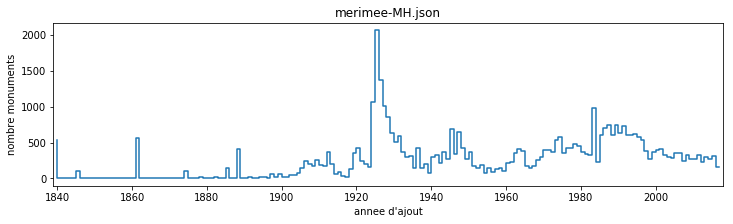

In [162]:
plt.figure(figsize=(12, 3));
plt.step( *zip(*counts) )
plt.ylabel('nombre monuments')
plt.xlabel("annee d'ajout")
plt.xlim( counts[0][0]-1, 2018)
plt.title('merimee-MH.json')

In [159]:
countsReversed = sorted( counts, key=lambda x:x[1] )
countsReversed[-1]

(1926, 2068)